# Analisis de Datos del Grupo G
### **Facultad Lationoamericana de Ciencias Sociales y Universidad J. F. Kennedy**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importates del dataset



## Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno, para asi mantener una consistencia.

In [151]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors


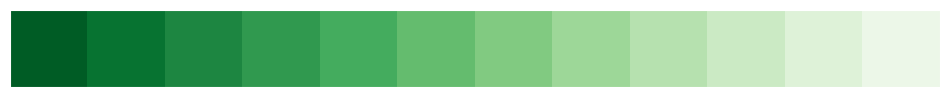

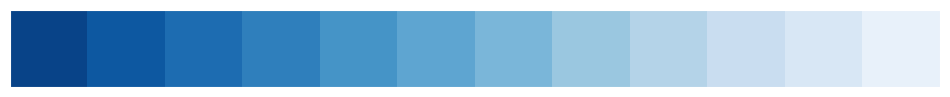

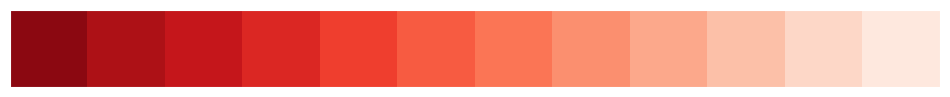

In [152]:
plt.rcParams['figure.dpi'] = 100
#plt.rcParams['figure.figsize'] = (8,12)
sns.set_style('dark')
colors_green = sns.color_palette("Greens",12)[::-1]
colors_blue = sns.color_palette("Blues",12)[::-1]
colors_red = sns.color_palette("Reds",12)[::-1]
sns.palplot(colors_green)
sns.palplot(colors_blue)
sns.palplot(colors_red)


###  **Importaciones de los datos**
En esta sección ***importamos los datasets transformados*** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la ***variable geográfica.***

In [153]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoG_Kennedy'
university1_name = 'Universidad J. F. Kennedy'
 

university2 = 'GrupoG_lsc'
university2_name = 'Facultad Lationoamericana de Ciencias Sociales'


df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep=',')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep=',')
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None,on_bad_lines='skip')




### *Primer acercamiento, correcciones y transformaciones adicionales*

En esta sección vemos los aspectos fundamentales de los datos a trabajar, hacemos algunas correcciones y expandimos los datos



In [154]:
#imprimimos las columnas de ambas tablas
print(university1_name)

df_1.columns #Universidad_tecnologica_universidad


Universidad J. F. Kennedy


Index(['Unnamed: 0', 'university', 'career', 'inscription_date', 'first_name',
       'last_name', 'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [155]:
df_2.columns #Universidad Tres de Febrero


Index(['Unnamed: 0', 'university', 'career', 'inscription_date', 'first_name',
       'last_name', 'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [156]:
print(university1_name)

df_1.info()

Universidad J. F. Kennedy
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1816 non-null   int64 
 1   university        1816 non-null   object
 2   career            1816 non-null   object
 3   inscription_date  1816 non-null   object
 4   first_name        1816 non-null   object
 5   last_name         1816 non-null   object
 6   gender            1816 non-null   object
 7   age               1816 non-null   int64 
 8   postal_code       1816 non-null   int64 
 9   location          1816 non-null   object
 10  email             1816 non-null   object
dtypes: int64(3), object(8)
memory usage: 156.2+ KB


In [157]:
print(university2_name)

df_2.info()


Facultad Lationoamericana de Ciencias Sociales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1907 non-null   int64 
 1   university        1907 non-null   object
 2   career            1907 non-null   object
 3   inscription_date  1907 non-null   object
 4   first_name        1907 non-null   object
 5   last_name         1907 non-null   object
 6   gender            1907 non-null   object
 7   age               1907 non-null   int64 
 8   postal_code       1907 non-null   int64 
 9   location          1907 non-null   object
 10  email             1907 non-null   object
dtypes: int64(3), object(8)
memory usage: 164.0+ KB


In [158]:
# para hacer un estudio sobre las carreras de ambas universidades imprimo la cantidad de carreras que contiene cada una

print(f'La cantida de carreras en la {university1_name} es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_2.career.unique()))


La cantida de carreras en la Universidad J. F. Kennedy es de: 33
La cantida de carreras en la Facultad Lationoamericana de Ciencias Sociales es de: 33


In [159]:
print(university1_name)

df_1.describe()


Universidad J. F. Kennedy


,Unnamed: 0,age,postal_code
count,1816.000000,1816.000000,1816.000000
mean,907.500000,45.319934,4847.953194
std,524.378362,30.280044,2220.188743
min,0.000000,0.000000,1601.000000
25%,453.750000,15.000000,2930.000000
50%,907.500000,44.000000,4634.000000
75%,1361.250000,72.000000,6530.250000
max,1815.000000,99.000000,9421.000000


In [160]:
print(university2_name)

df_2.describe()


Facultad Lationoamericana de Ciencias Sociales


,Unnamed: 0,age,postal_code
count,1907.0000,1907.000000,1907.000000
mean,953.0000,57.354483,4697.887257
std,550.6478,34.004524,2197.127077
min,0.0000,1.000000,1601.000000
25%,476.5000,28.000000,2912.000000
50%,953.0000,56.000000,4164.000000
75%,1429.5000,87.000000,6374.500000
max,1906.0000,117.000000,9420.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica.Por lo tanto gráficamos como se vería la distribución de los valores de edad.

Siendo que la edad de ingreso a la universidad usualmente es de 17-18 años y siendo que la esperanza de vida de argentina es hasta los 72 años aproximadamente (1). Esta
(1) https://datosmacro.expansion.com/demografia/esperanza-vida/argentina#:~:text=En%202020%20la%20esperanza%20de,fue%20de%2073%2C41%20a%C3%B1os.

Text(0.5, 9.444444444444438, 'Edad')

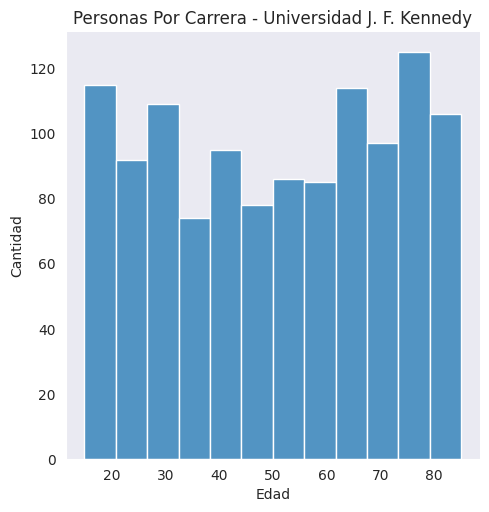

In [161]:
df_1 = df_1[df_1.age.between(15,85)] #aplicamos una reduccion del maximo y minimo de edad que puede tener un alumno para valores mas coherentes
df_2 = df_2[df_2.age.between(15,85)]



sns.displot(df_1.age)
plt.title(f'Personas por carrera - {university1_name}'.title())

plt.ylabel('Cantidad')
plt.xlabel('Edad')




Text(0.5, 9.444444444444438, 'Edad')

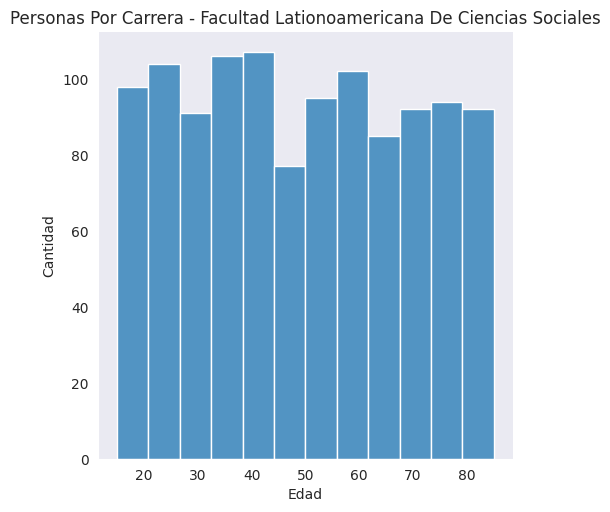

In [162]:
sns.displot(df_2.age)
plt.title(f'Personas por carrera - {university2_name}'.title())

plt.ylabel('Cantidad')
plt.xlabel('Edad')


Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [163]:
df_geonames.dropna(axis=1, inplace=True)



In [164]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [165]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [166]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')

In [167]:

df_2geonames_merge.head(2)


,country,postal_code,location_x,region,type,lat,lon,type_2,Unnamed: 0,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,2717,JUAN A. DE LA PEÑA,Buenos Aires,B,-33.8333,-60.4833,4.0,4,facultad latinoamericana de ciencias sociales,ingeniería mecánica,2020-12-01,danielle,watson,female,57,acevedo,russellgina@gmail.com
1,AR,2717,ACEVEDO,Buenos Aires,B,-33.7500,-60.4500,4.0,4,facultad latinoamericana de ciencias sociales,ingeniería mecánica,2020-12-01,danielle,watson,female,57,acevedo,russellgina@gmail.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

## Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

Text(0, 0.5, 'Carrera')

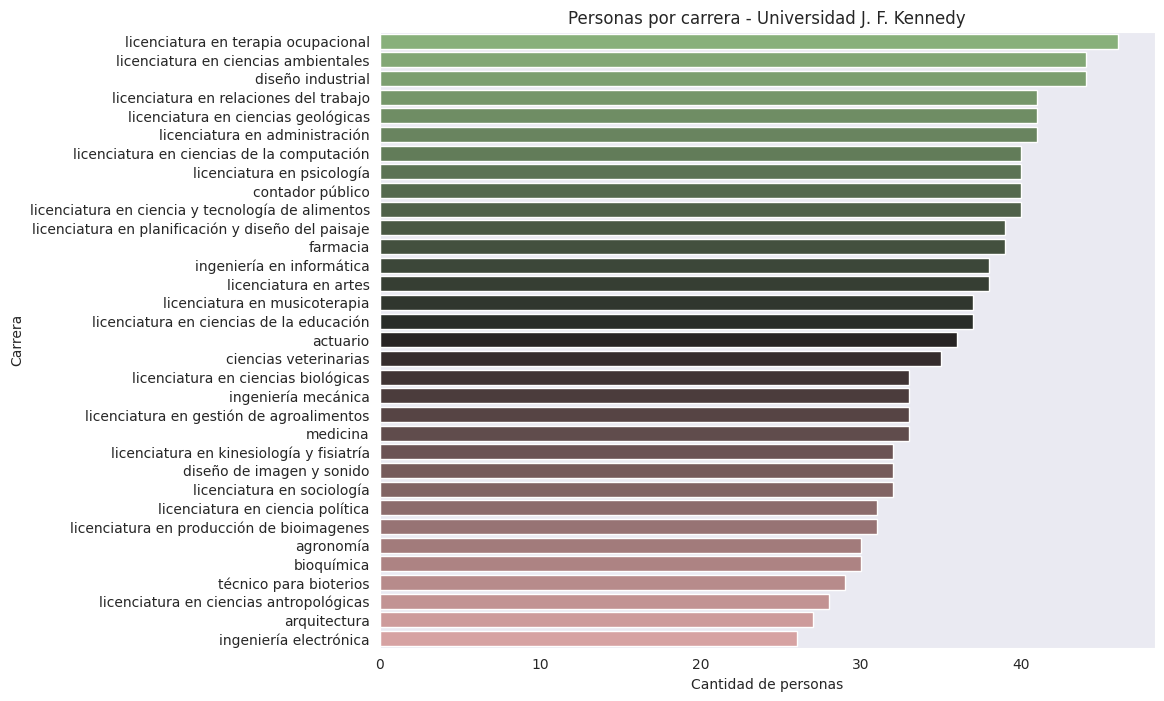

In [168]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university1_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')


En principio podémos observar que hay una diferencia entre la cantidad de personas que componen el alumnado, al observar el total de alumnos de cada carrera.



Text(0, 0.5, 'Carrera')

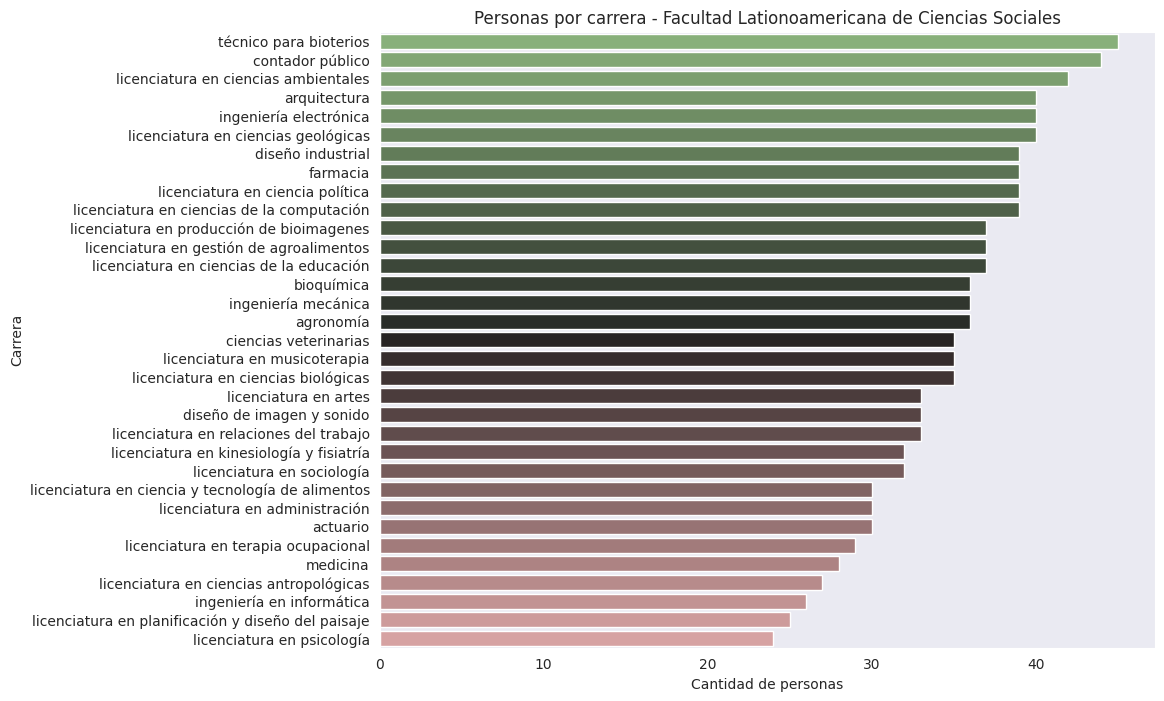

In [169]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')


Esto es algo que se repite en esta universidad, pero la cantidad de alumnos por carrera es más grande y la diferencia parece ser más atenuada entre la carrera más concurrida con la menor concurrida.



## Detalle de la variable carrera
Para evaluar más en detalle la composición de alumnos para las diferentes carreras se propone observar las diez carreras con más alumnos de cada universidad y las 10 carreras con menos alumnos de cada universidad, para además comparar con la media de alumnos de toda la oferta académica.

## Universidad J. F. Kennedy

Text(0, 0.5, 'Carrera')

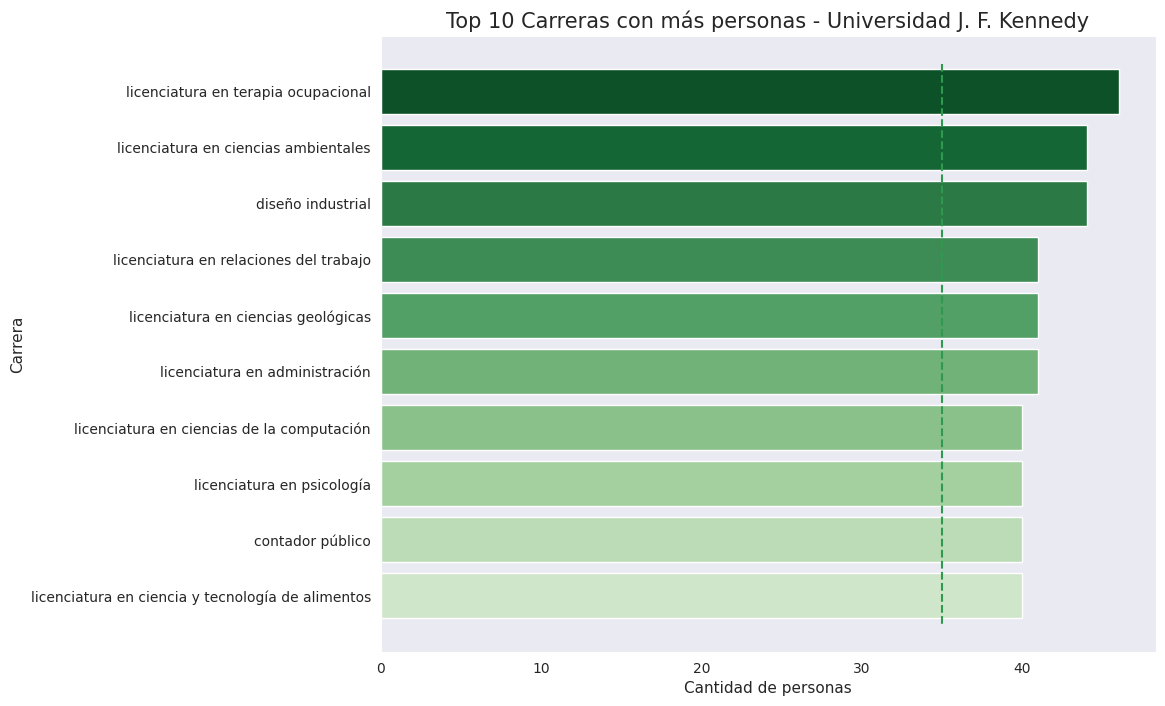

<Figure size 1000x800 with 0 Axes>

In [170]:


df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))


plt.figure(figsize=(10, 8))


sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

/tmp/ipykernel_1064985/497808238.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


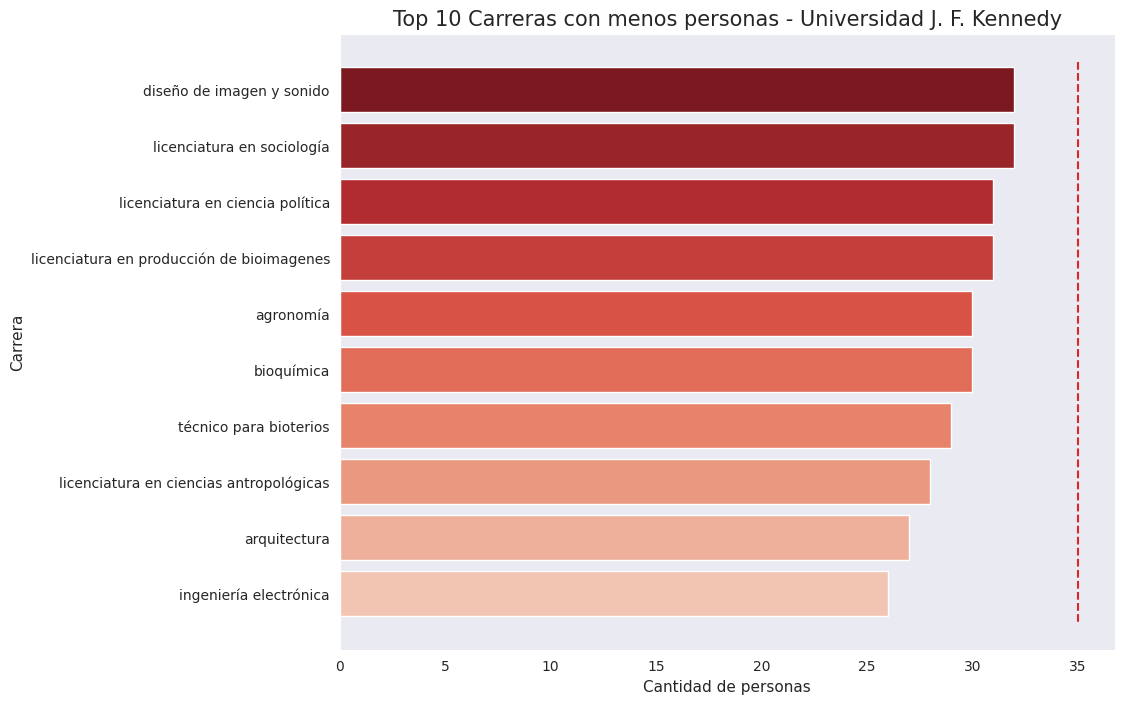

In [171]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

Como se puede observar en este gráfico, estás 10 carreras son las que menor cantidad de alumnos presenta y que se encuentran cerca de la media de todas las carreras, vista como una línea punteada en el gráfico.



Text(0, 0.5, 'Cantidad de carreras')

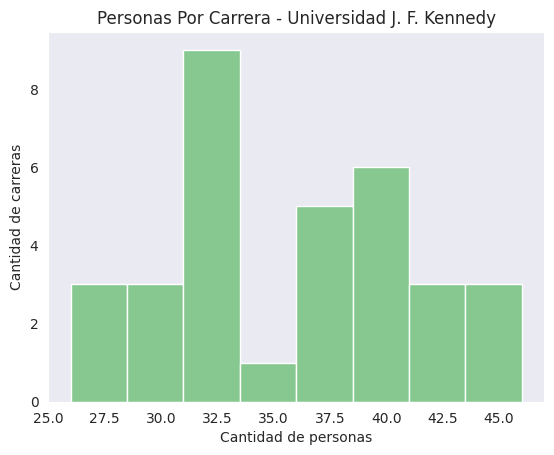

In [172]:

sns.histplot(df_1.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [173]:


#vemos los estadisticos de la distribucion de alumnos por carrera
df_1.career.value_counts().describe()

count    33.000000
mean     35.636364
std       5.278602
min      26.000000
25%      32.000000
50%      36.000000
75%      40.000000
max      46.000000
Name: career, dtype: float64

Como podémos observar la distribución de alumnos por carrera tiene una media de 32 alumnos y parece estar sesgada hacía la derecha, en este caso la mayoría de las carreras tienen al menos 35 alumnos.



## Facultad Lationoamericana de Ciencias Sociales

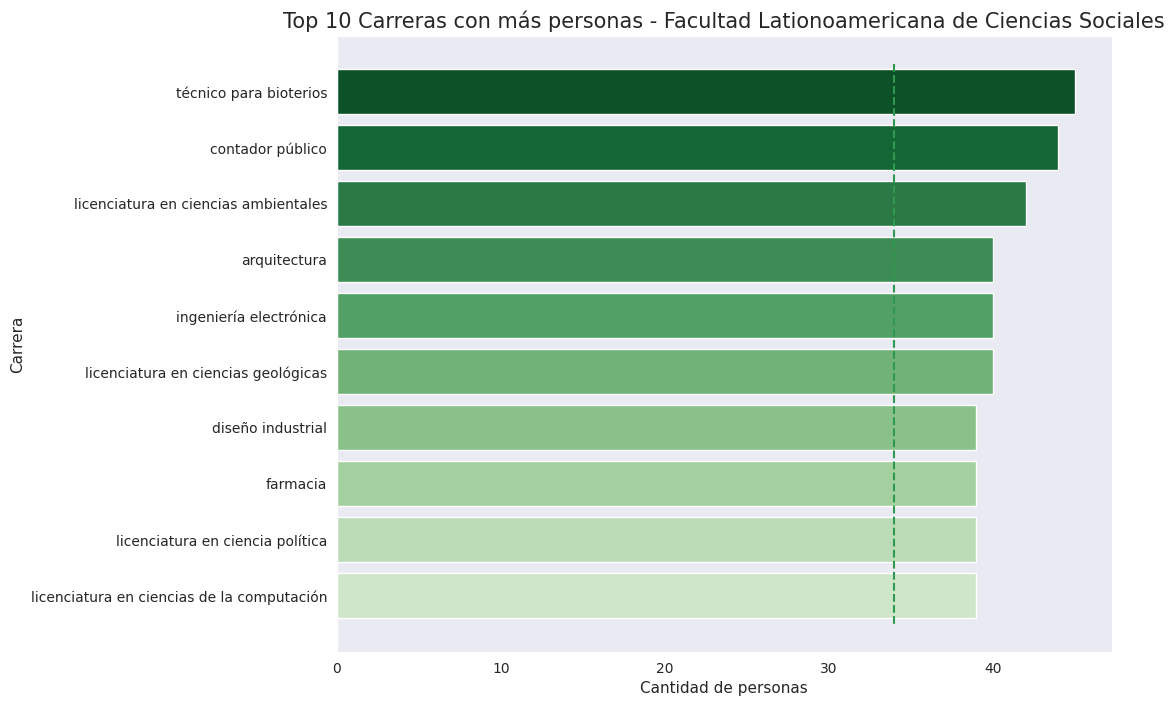

<Figure size 1000x800 with 0 Axes>

In [174]:

df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))


plt.figure(figsize=(10, 8))


sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})
plt.show()

/tmp/ipykernel_1064985/250912100.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


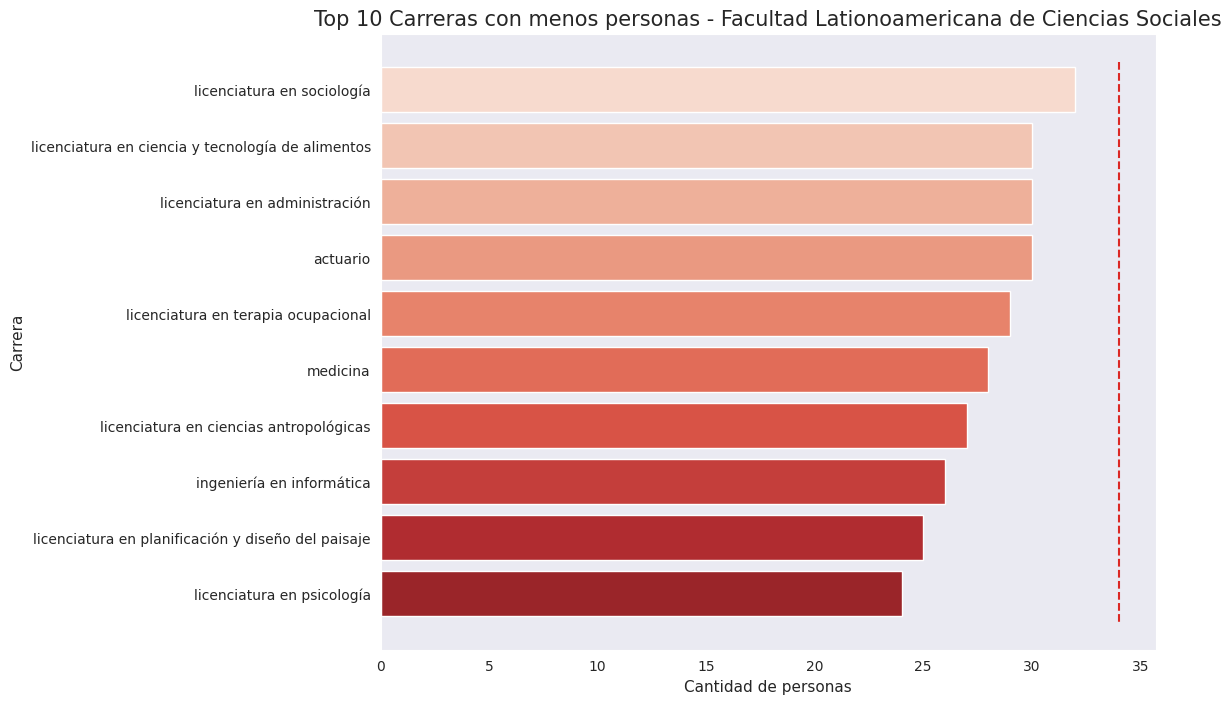

In [175]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

Text(0, 0.5, 'Cantidad de carreras')

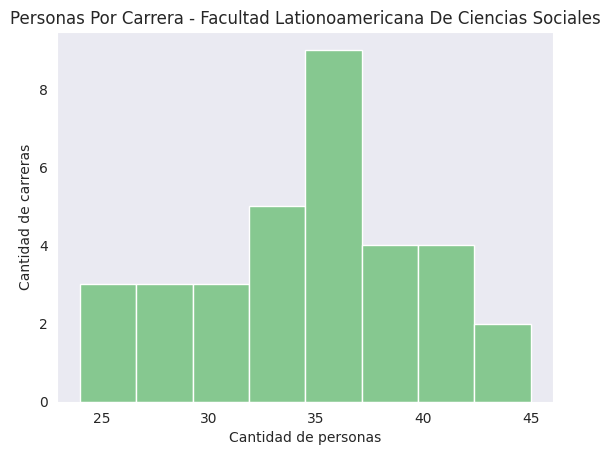

In [176]:


sns.histplot(df_2.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')



In [177]:


#vemos los estadisticos de la distribucion de alumnos por carrera
df_2.career.value_counts().describe()


count    33.000000
mean     34.636364
std       5.407276
min      24.000000
25%      30.000000
50%      35.000000
75%      39.000000
max      45.000000
Name: career, dtype: float64

En este caso la media es de 34 alumnos por carrera, presentando un minímo de 24, pero la mayoría de las carreras tienen al menos 35 alumnos en esta universidad. Parece tratarse de una distribución normal de las carreras.



Análisis por género y edad 


Universidad J. F. Kennedy


<AxesSubplot: xlabel='gender', ylabel='age'>

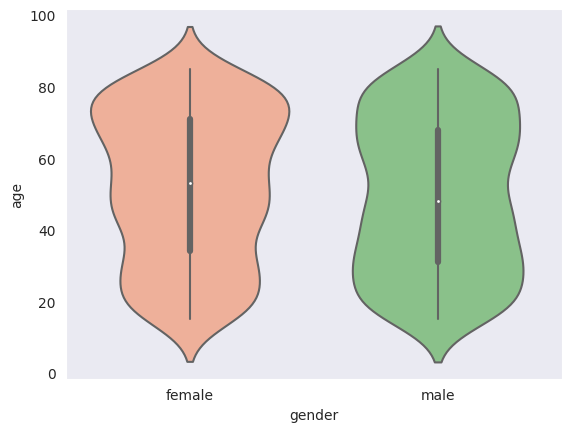

In [178]:
#Tambien otro analisis que nos puede ayudar es ver la distribucion por edad tanto entre hombres y mujeres de cada universidad
print(university1_name)

sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[8], colors_green[6]])


Facultad Lationoamericana de Ciencias Sociales


<AxesSubplot: xlabel='gender', ylabel='age'>

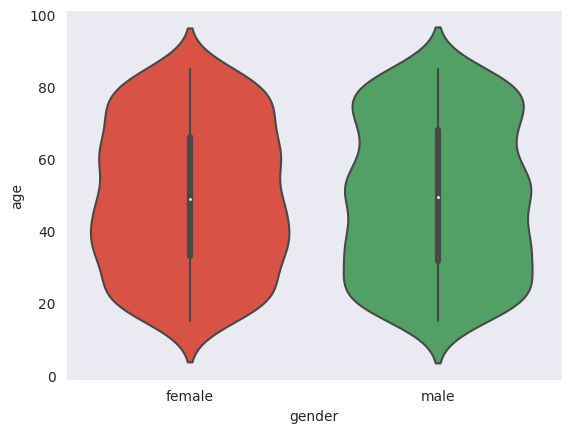

In [179]:
print(university2_name)

sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

*como se logra ver Ambas universidades mantienen una distribucion de densidad parecida pero la universidad de moron tiene un gran porcentaje de alumnos mas mayores *

### top 10 localidades por alumnos


In [180]:
print(university1_name)
df_1.location.value_counts().head(10)

Universidad J. F. Kennedy


agua amarilla la hoyada    5
agua blanca                5
agua negra                 5
9 de julio                 5
kilometro 374              5
25 de mayo                 5
agua salada                4
alfredo peña               4
arroyito                   4
alto los cardales          4
Name: location, dtype: int64

In [181]:
print(university2_name)
df_2.location.value_counts().head(10)

Facultad Lationoamericana de Ciencias Sociales


25 de mayo       9
agua colorada    7
9 de julio       5
alto verde       5
agua linda       5
algarrobo        5
bella vista      5
castelar         5
acevedo          4
arrayanal        4
Name: location, dtype: int64

**Distribucion de alumnos por edad y género**

Universidad J. F. Kennedy


<AxesSubplot: xlabel='age', ylabel='Density'>

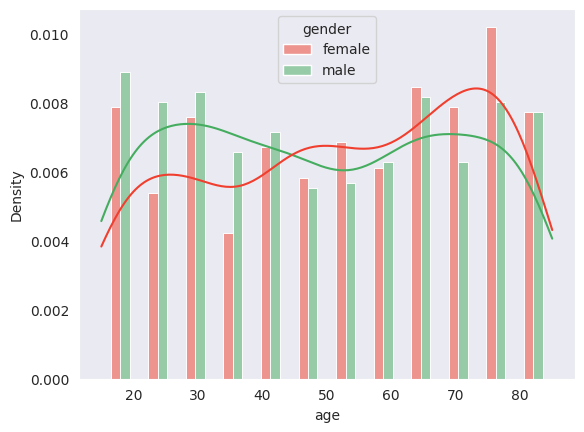

In [182]:
print(university1_name)
sns.histplot(data=df_1,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])


Facultad Lationoamericana de Ciencias Sociales


<AxesSubplot: xlabel='age', ylabel='Density'>

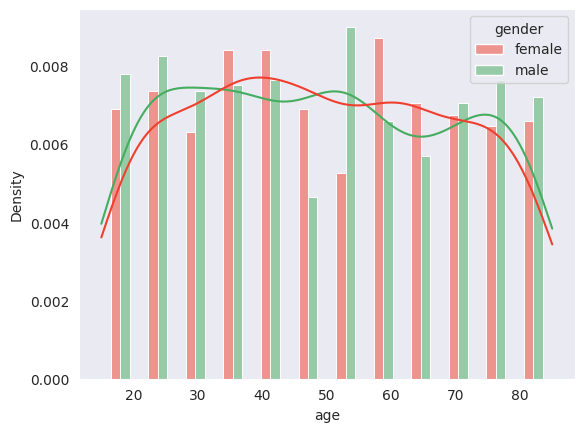

In [183]:
print(university2_name)
sns.histplot(data=df_2,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])


Otra forma de visualizar esto es a través de un gráfico de tipo histograma categorizado y sus respectivas curvas de densidad aproximada. En este caso podemos ver las dos modas en la distribución de los varones


In [184]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)



Segregación por tipo de carrera


In [185]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género



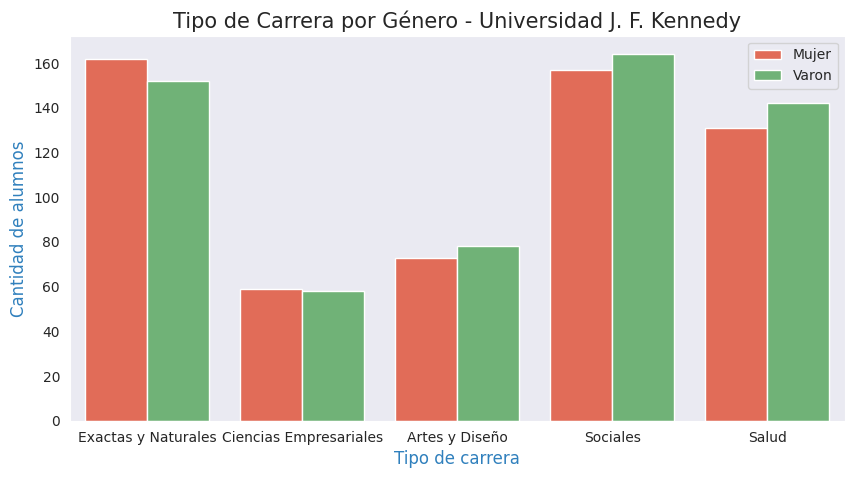

In [186]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_blue[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_blue[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


En la Universidad j.f Kennedy parece haber cierta paridad de varones frente a mujeres en todos los tipos de carreras aunque mayormente en exactas y naturales hay mayor porcentaje de mujeres


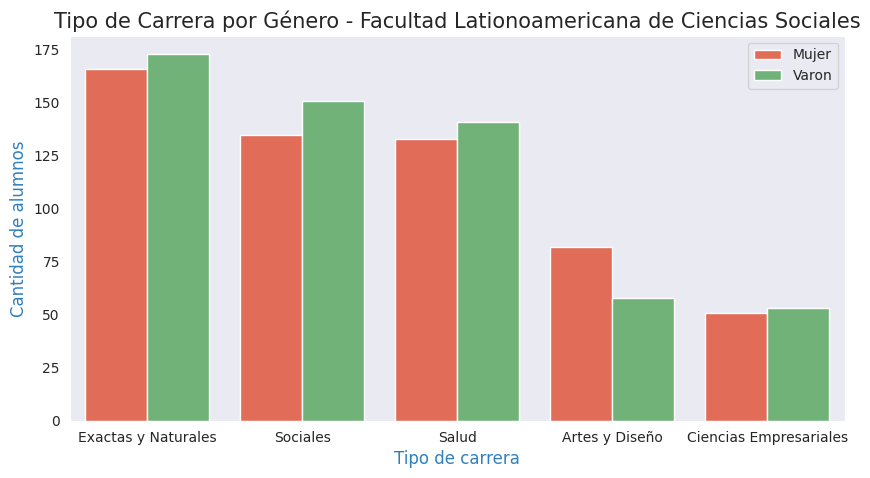

In [187]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_blue[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_blue[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

En la Facultad Latinoamericana de Ciencias Sociales parece haber cierta mayoria de varones frente a mujeres en todos los tipos de carreras aunque en artes y diseño vemos mas mujeres por carrera.


### Provincias analisis

/tmp/ipykernel_1064985/2202455473.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


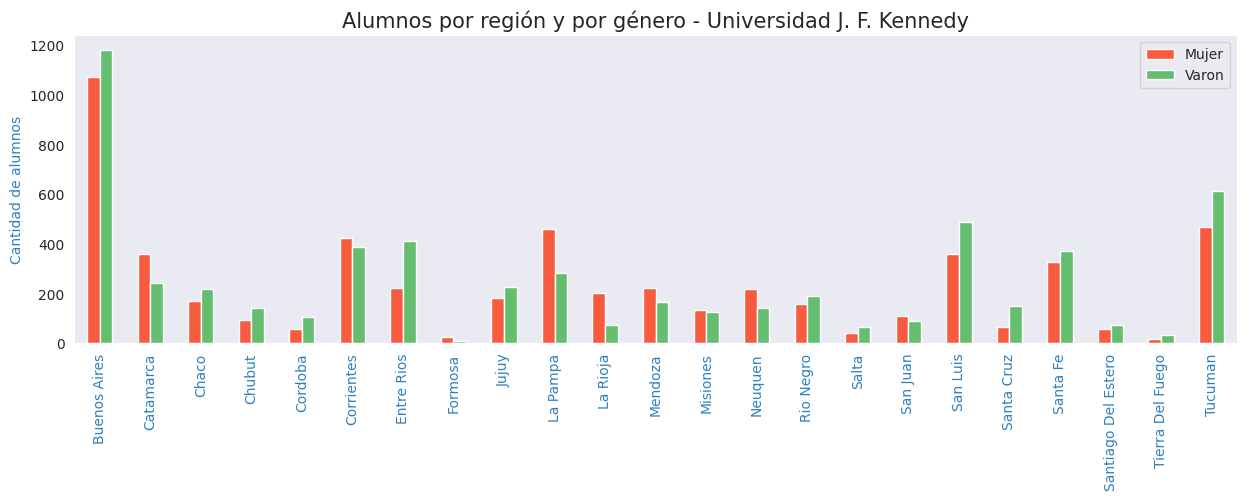

In [188]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_blue[3]})
ax.tick_params(axis='x', colors=colors_blue[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()


En estos gráfico de barras apareadas y ordenadas de forma descendente por género. Respecto a la distribución de alumnos por provincia podemos observar que la gran mayoría de los alumnos provienen de la Provincia de Buenos Aires y es destacable la diferencia entre géneros



Text(0.5, 0, '')

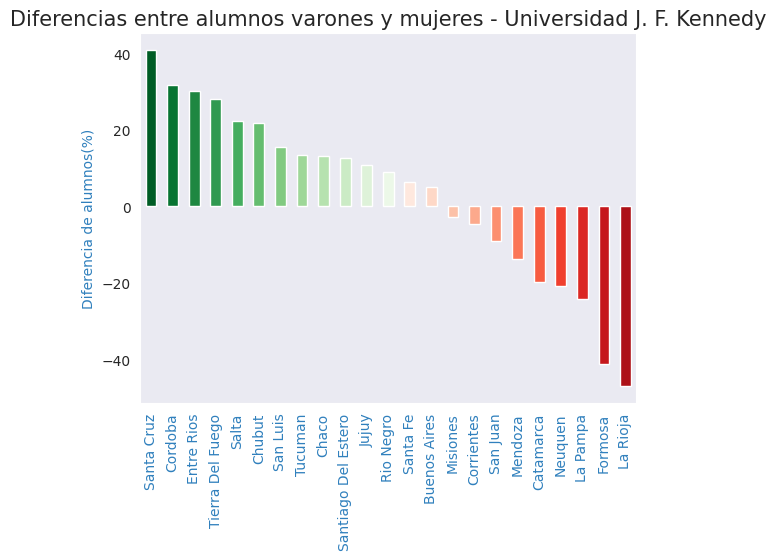

In [189]:


fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university1_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_blue[3]})
ax.tick_params(axis='x', colors=colors_blue[3])
ax.set_xlabel('')


/tmp/ipykernel_1064985/3203588924.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


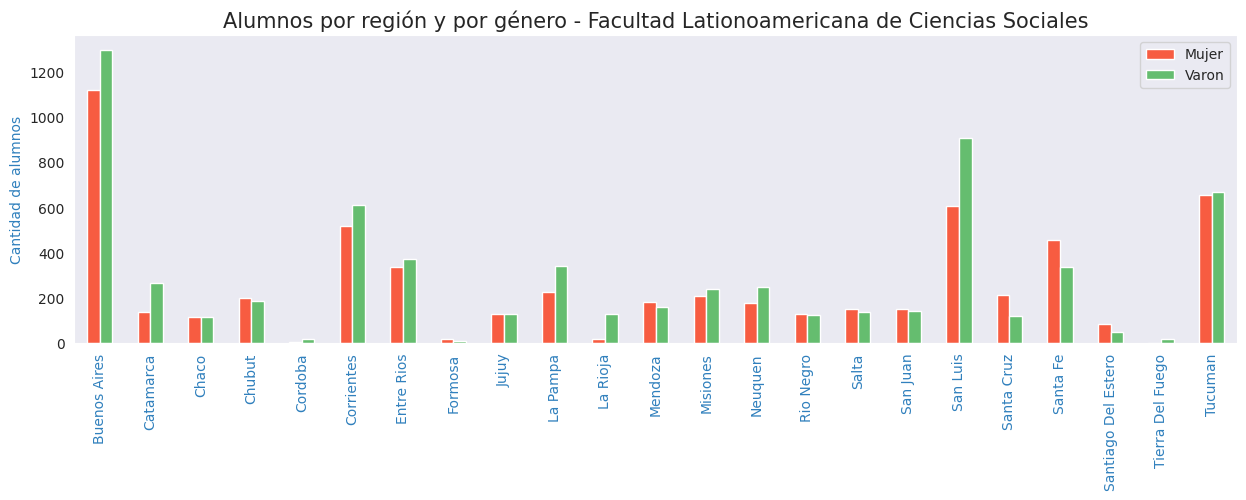

In [190]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_blue[3]})
ax.tick_params(axis='x', colors=colors_blue[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

Text(0.5, 0, '')

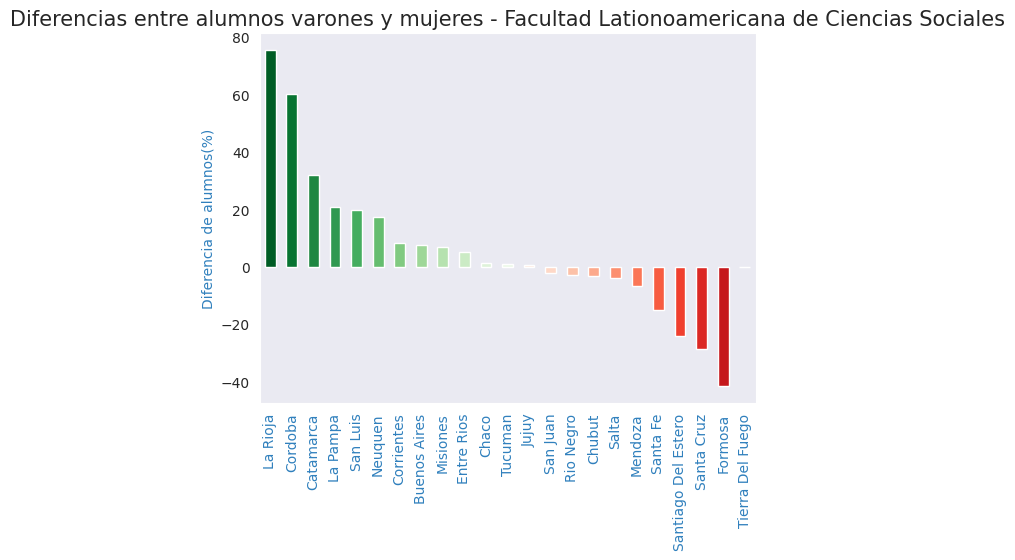

In [191]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university2_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_blue[3]})
ax.tick_params(axis='x', colors=colors_blue[3])
ax.set_xlabel('')


Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. La Rioja es la que presenta mayor disparidad respecto a varones junto con Tierra del Fuego y Formosa. Respecto a disparidad de mujeres Salta, Chaco y Neuquén son las que presentan menor disparidad de alumnas provenientes de esas provincias.



## Algunos ejemplos:

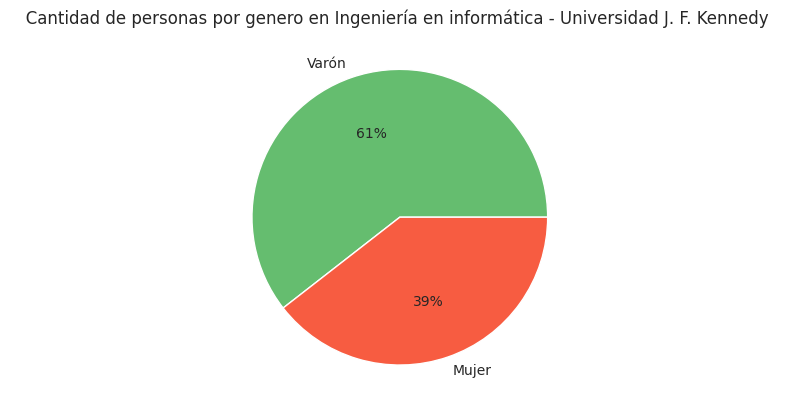

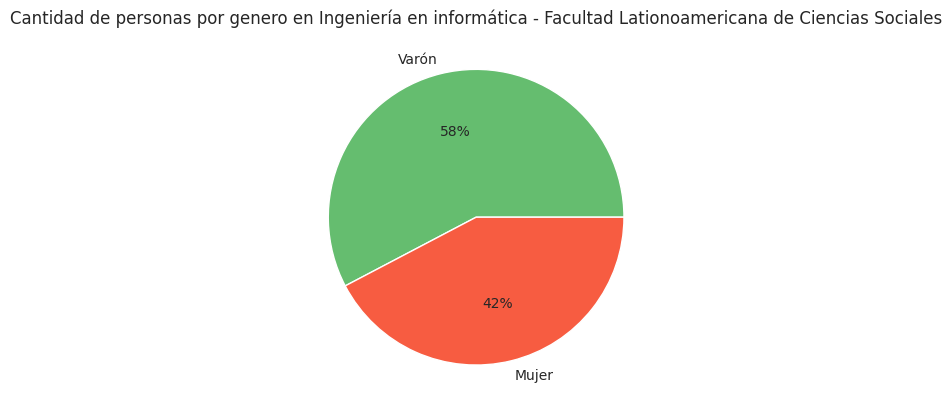

In [192]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

La carrera de informática suele tener el prejuicio de ser una carrera propia de varones, como vemos en este caso, vemos en ambas universidades que la disparidad  es significativo.


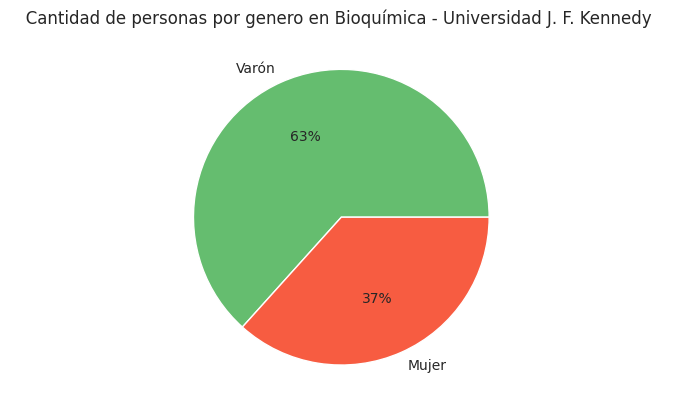

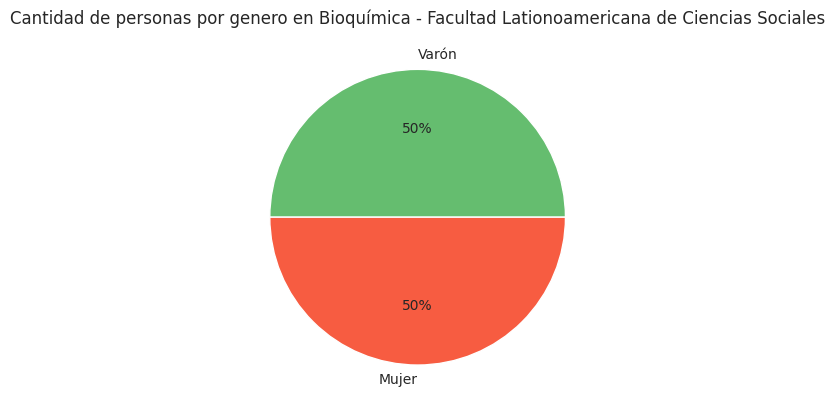

In [193]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


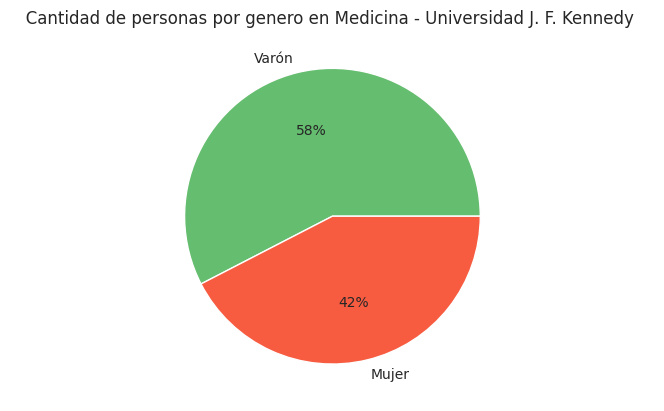

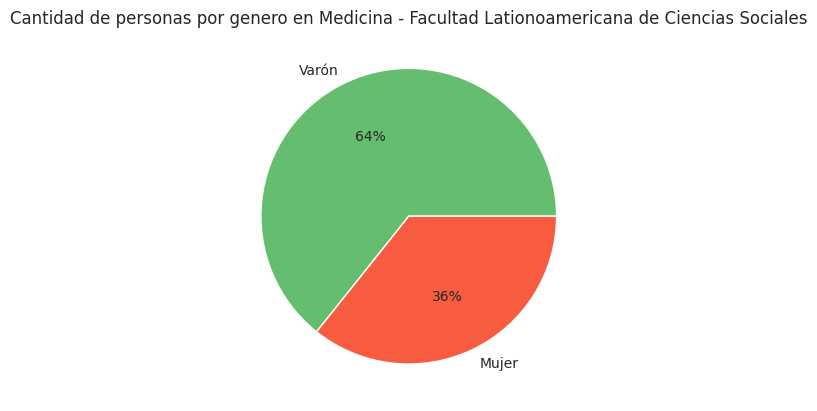

In [194]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

### *Conclusiones*

UJFKennedy tiene una distribución uniforme en la edad, con lo cuál es importante remarcar que la cantidad de alumnos de todas las edades en edad de trabajo es alta y podría ser interesante la estimulación de turnos y comisiones nocturnas para no interferir con sus actividades
UJFKennedy tiene cierta disparidad en todos sus tipos de carreras con menor porcentaje de mujeres en todas a excepcion de exactas y naturales, con lo cuál se recomienda incentivar y otorgar becas para generar equidad en aquellas con menor proporción de alumnas, especialmente en las carreras de salud.
Facultad de ciencias sociales tiene una distribución uniforme en la edad, con lo cuál es importante remarcar que la cantidad de alumnos de todas las edades en edad de trabajo es alta y podría ser interesante la estimulación de turnos y comisiones nocturnas para no interferir con sus actividades
Facultad de ciencias sociales  tiene cierta disparidad de genero a lo largo de sus carreras con mayor numero de varones, aunque podría destacarse que las carreras de  arte y diseño están más pobladas de alumnas,con lo cuál podría otorgarse incentivos para estimular la paridad en esos sectores.